# Clasificación de Residuos - Análisis Exploratorio de Datos (EDA)

**Proyecto:** Clasificación Automática de Residuos mediante Deep Learning  
**Asignatura:** Aprendizaje Profundo  
**Entrega 1:** EDA y Configuración del Proyecto  

---

## Objetivos del Notebook

Este notebook realiza un análisis exploratorio completo del dataset **TrashNet** para entender sus características antes de entrenar modelos de clasificación. Los objetivos específicos son:

1. **Descargar y cargar** el dataset TrashNet desde Kaggle
2. **Estructurar** los datos en variables `X` (imágenes) e `y` (etiquetas)
3. **Analizar** la distribución de clases y características de las imágenes
4. **Visualizar** muestras representativas de cada categoría
5. **Identificar** desafíos potenciales (desbalanceo, variabilidad, etc.)

## 1. Configuración del Entorno

Instalamos las dependencias necesarias e importamos las librerías.

In [1]:
# Imports estándar
import os
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Configuración para reproducibilidad
np.random.seed(42)

## 2. Configuración y Carga de Datos


Configuramos la ruta al dataset y cargamos todas las imágenes en las variables:
- **`X`**: Array de imágenes en formato RGB (numpy array)
- **`y`**: Array de etiquetas numéricas correspondientes a cada clase
- **`class_names`**: Lista con los nombres de las clases detectadas

El proceso identifica automáticamente las carpetas de clases y carga todas las imágenes manteniendo su tamaño original para el análisis exploratorio.

In [2]:
# Ruta al dataset desde carpeta notebooks
path = Path('../data/raw')

# Encontrar clases (carpetas con imágenes)
image_ext = {'.jpg', '.jpeg', '.png'}
class_dirs = [d for d in path.iterdir() if d.is_dir() and 
              any(f.suffix.lower() in image_ext for f in d.iterdir())]

# Cargar imágenes en X e y
X, y, class_names = [], [], []

for idx, class_dir in enumerate(sorted(class_dirs)):
    class_names.append(class_dir.name)
    for img_file in class_dir.glob('*'):
        if img_file.suffix.lower() in image_ext:
            try:
                img = np.array(Image.open(img_file).convert('RGB'))
                X.append(img)
                y.append(idx)
            except: pass

X, y = np.array(X, dtype=object), np.array(y)

print(f"Clases: {class_names}")
print(f"Total imágenes: {len(X)}")
print(f"Distribución: {dict(zip(class_names, np.bincount(y)))}")

Clases: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Total imágenes: 2527
Distribución: {'cardboard': np.int64(403), 'glass': np.int64(501), 'metal': np.int64(410), 'paper': np.int64(594), 'plastic': np.int64(482), 'trash': np.int64(137)}


## 3. Estadísticas Básicas del Dataset

Análisis cuantitativo de las características principales del dataset.

In [3]:
# Información general
print("=" * 60)
print("RESUMEN DEL DATASET TRASHNET")
print("=" * 60)
print(f"\n📊 Total de imágenes: {len(X):,}")
print(f"🏷️  Número de clases: {len(class_names)}")
print(f"📝 Clases: {', '.join(class_names)}")
print(f"\n📐 Shape del array X: {X.shape}")
print(f"📐 Shape del array y: {y.shape}")
print(f"\n💾 Memoria utilizada por X: {X.nbytes / (1024**2):.2f} MB")
print(f"🔢 Tipo de datos de X: {X.dtype}")
print(f"🔢 Tipo de datos de y: {y.dtype}")

RESUMEN DEL DATASET TRASHNET

📊 Total de imágenes: 2,527
🏷️  Número de clases: 6
📝 Clases: cardboard, glass, metal, paper, plastic, trash

📐 Shape del array X: (2527, 384, 512, 3)
📐 Shape del array y: (2527,)

💾 Memoria utilizada por X: 11371.50 MB
🔢 Tipo de datos de X: object
🔢 Tipo de datos de y: int64


## 4. Análisis de Distribución de Clases

Evaluamos si existe desbalanceo entre las diferentes categorías.

In [4]:
# Contar imágenes por clase
class_counts = Counter(y)
class_distribution = pd.DataFrame([
    {
        'Clase': class_names[idx],
        'Índice': idx,
        'Cantidad': count,
        'Porcentaje': (count / len(y)) * 100
    }
    for idx, count in sorted(class_counts.items())
])

print("\nDistribución de clases:")
print(class_distribution.to_string(index=False))

# Calcular métricas de desbalanceo
max_count = class_distribution['Cantidad'].max()
min_count = class_distribution['Cantidad'].min()
imbalance_ratio = max_count / min_count

print(f"\n📈 Clase más frecuente: {class_distribution.loc[class_distribution['Cantidad'].idxmax(), 'Clase']} ({max_count} imágenes)")
print(f"📉 Clase menos frecuente: {class_distribution.loc[class_distribution['Cantidad'].idxmin(), 'Clase']} ({min_count} imágenes)")
print(f"⚖️  Ratio de desbalanceo: {imbalance_ratio:.2f}:1")


Distribución de clases:
    Clase  Índice  Cantidad  Porcentaje
cardboard       0       403   15.947764
    glass       1       501   19.825880
    metal       2       410   16.224772
    paper       3       594   23.506134
  plastic       4       482   19.074001
    trash       5       137    5.421448

📈 Clase más frecuente: paper (594 imágenes)
📉 Clase menos frecuente: trash (137 imágenes)
⚖️  Ratio de desbalanceo: 4.34:1


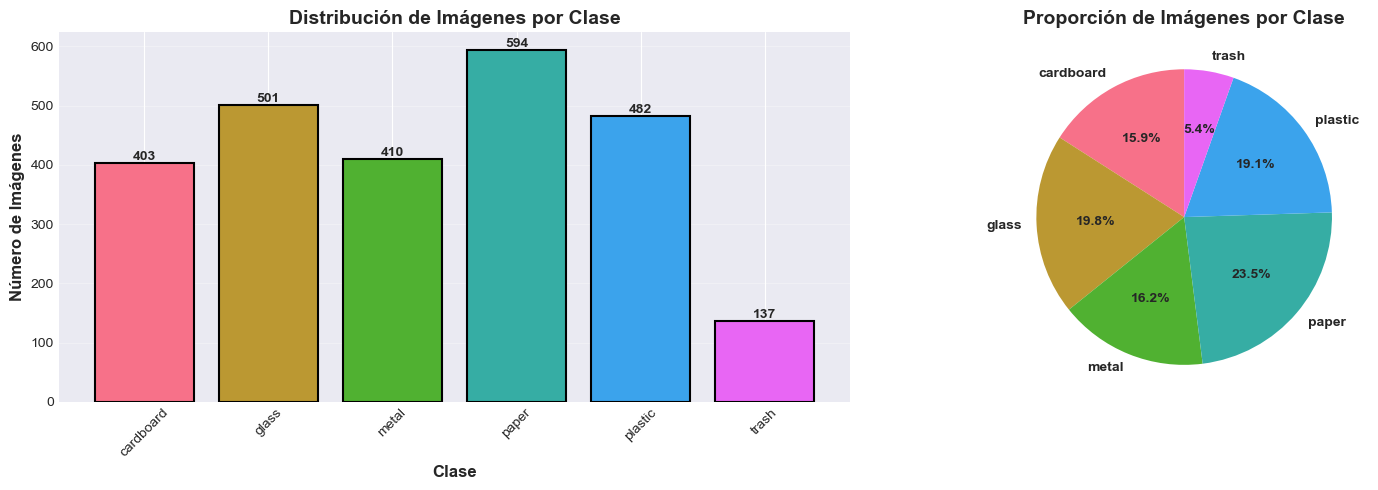

In [5]:
# Visualización de la distribución de clases
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras
ax1 = axes[0]
bars = ax1.bar(class_distribution['Clase'], class_distribution['Cantidad'], 
               color=sns.color_palette("husl", len(class_names)), 
               edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Imágenes', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Imágenes por Clase', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

# Gráfico de pastel
ax2 = axes[1]
colors = sns.color_palette("husl", len(class_names))
wedges, texts, autotexts = ax2.pie(class_distribution['Cantidad'], 
                                     labels=class_distribution['Clase'],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     textprops={'fontweight': 'bold'})
ax2.set_title('Proporción de Imágenes por Clase', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Análisis de Características de las Imágenes

Estudiamos las dimensiones, resoluciones y características técnicas de las imágenes.

In [6]:
# Analizar dimensiones de las imágenes
# Nota: Como las imágenes pueden tener diferentes tamaños, 
# necesitamos analizar cada una individualmente

heights = []
widths = []
aspect_ratios = []

# Volver a cargar información de tamaño desde archivos originales
# (más eficiente que almacenar todas las imágenes de diferentes tamaños)
print("Analizando dimensiones de las imágenes...")
for class_dir in sorted(class_dirs):
    image_files = [f for f in class_dir.iterdir() 
                  if f.is_file() and f.suffix.lower() in image_ext]
    
    for img_file in image_files:
        try:
            with Image.open(img_file) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
                aspect_ratios.append(w / h)
        except:
            pass

# Estadísticas de dimensiones
print("\n" + "="*60)
print("CARACTERÍSTICAS DE LAS IMÁGENES")
print("="*60)

print(f"\n📏 Ancho (Width):")
print(f"   Min: {min(widths)} px")
print(f"   Max: {max(widths)} px")
print(f"   Media: {np.mean(widths):.2f} px")
print(f"   Mediana: {np.median(widths):.2f} px")
print(f"   Std: {np.std(widths):.2f} px")

print(f"\n📏 Alto (Height):")
print(f"   Min: {min(heights)} px")
print(f"   Max: {max(heights)} px")
print(f"   Media: {np.mean(heights):.2f} px")
print(f"   Mediana: {np.median(heights):.2f} px")
print(f"   Std: {np.std(heights):.2f} px")

print(f"\n📐 Aspect Ratio (Width/Height):")
print(f"   Min: {min(aspect_ratios):.3f}")
print(f"   Max: {max(aspect_ratios):.3f}")
print(f"   Media: {np.mean(aspect_ratios):.3f}")

# Verificar si todas las imágenes tienen el mismo tamaño
unique_sizes = set(zip(widths, heights))
if len(unique_sizes) == 1:
    print(f"\n✅ Todas las imágenes tienen el mismo tamaño: {list(unique_sizes)[0]}")
else:
    print(f"\n⚠️  Las imágenes tienen {len(unique_sizes)} tamaños diferentes")
    print(f"   Tamaños más comunes:")
    size_counts = Counter(zip(widths, heights))
    for size, count in size_counts.most_common(5):
        print(f"   - {size[0]}x{size[1]}: {count} imágenes ({count/len(widths)*100:.1f}%)")

Analizando dimensiones de las imágenes...

CARACTERÍSTICAS DE LAS IMÁGENES

📏 Ancho (Width):
   Min: 512 px
   Max: 512 px
   Media: 512.00 px
   Mediana: 512.00 px
   Std: 0.00 px

📏 Alto (Height):
   Min: 384 px
   Max: 384 px
   Media: 384.00 px
   Mediana: 384.00 px
   Std: 0.00 px

📐 Aspect Ratio (Width/Height):
   Min: 1.333
   Max: 1.333
   Media: 1.333

✅ Todas las imágenes tienen el mismo tamaño: (512, 384)


## 8. Análisis Estadístico de Valores de Píxeles

Analizamos las características de los valores de píxeles (intensidad, distribución de colores).

In [7]:
# Estadísticas de píxeles por clase y canal (USANDO TODO EL DATASET)
print("="*60)
print("ESTADÍSTICAS DE PÍXELES POR CLASE")
print("="*60)

import pandas as pd # Asegúrate de tener pandas importado

class_stats = []

# Iteramos sobre cada clase disponible
for idx, class_name in enumerate(class_names):
    # Obtener índices de todas las imágenes pertenecientes a esta clase
    indices = np.where(y == idx)[0]
    count = len(indices)
    
    print(f"Analizando clase '{class_name}' ({count} imágenes)...")
    
    # Inicializamos acumuladores para este clase
    # Usamos listas para evitar cargar todo en memoria si el dataset fuera masivo,
    # aunque con 2500 imágenes es manejable.
    vals_r = []
    vals_g = []
    vals_b = []
    
    for i in indices:
        img = X[i]
        # Aplanar y extender. Se asume que img es (H, W, 3) RGB
        vals_r.extend(img[:, :, 0].flatten())
        vals_g.extend(img[:, :, 1].flatten())
        vals_b.extend(img[:, :, 2].flatten())
        
    # Convertir a arrays para cálculos vectorizados
    vals_r = np.array(vals_r)
    vals_g = np.array(vals_g)
    vals_b = np.array(vals_b)
    
    # Guardar estadísticas
    stats = {
        'Clase': class_name,
        'Num_Imgs': count,
        'R_mean': np.mean(vals_r), 'R_std': np.std(vals_r),
        'G_mean': np.mean(vals_g), 'G_std': np.std(vals_g),
        'B_mean': np.mean(vals_b), 'B_std': np.std(vals_b)
    }
    class_stats.append(stats)
    
    # Imprimir resumen rápido
    print(f"  -> R: {stats['R_mean']:.1f} ± {stats['R_std']:.1f}")
    print(f"  -> G: {stats['G_mean']:.1f} ± {stats['G_std']:.1f}")
    print(f"  -> B: {stats['B_mean']:.1f} ± {stats['B_std']:.1f}")
    print("-" * 30)

# Crear DataFrame con los resultados
df_stats = pd.DataFrame(class_stats)

print("\nRESUMEN FINAL TABULADO:")
# Mostrar tabla redondeada (si usas Jupyter, display(df_stats) queda mejor)
try:
    display(df_stats.round(2))
except NameError:
    print(df_stats.round(2))

ESTADÍSTICAS DE PÍXELES POR CLASE
Analizando clase 'cardboard' (403 imágenes)...
  -> R: 170.1 ± 51.6
  -> G: 148.9 ± 53.3
  -> B: 127.9 ± 59.5
------------------------------
Analizando clase 'glass' (501 imágenes)...
  -> R: 176.4 ± 53.1
  -> G: 170.5 ± 52.0
  -> B: 163.1 ± 58.9
------------------------------
Analizando clase 'metal' (410 imágenes)...
  -> R: 164.8 ± 62.5
  -> G: 157.0 ± 62.1
  -> B: 151.9 ± 67.5
------------------------------
Analizando clase 'paper' (594 imágenes)...
  -> R: 172.2 ± 54.6
  -> G: 164.6 ± 55.9
  -> B: 155.4 ± 56.6
------------------------------
Analizando clase 'plastic' (482 imágenes)...
  -> R: 171.1 ± 44.2
  -> G: 170.1 ± 41.2
  -> B: 169.0 ± 47.5
------------------------------
Analizando clase 'trash' (137 imágenes)...
  -> R: 178.8 ± 49.2
  -> G: 166.1 ± 49.0
  -> B: 149.0 ± 51.3
------------------------------

RESUMEN FINAL TABULADO:


,Clase,Num_Imgs,R_mean,R_std,G_mean,G_std,B_mean,B_std
0,cardboard,403,170.08,51.61,148.86,53.25,127.93,59.47
1,glass,501,176.38,53.06,170.52,51.99,163.10,58.86
2,metal,410,164.83,62.53,157.01,62.14,151.90,67.52
3,paper,594,172.18,54.62,164.55,55.95,155.43,56.64
4,plastic,482,171.09,44.23,170.09,41.18,168.98,47.54
5,trash,137,178.80,49.19,166.11,49.00,149.05,51.28


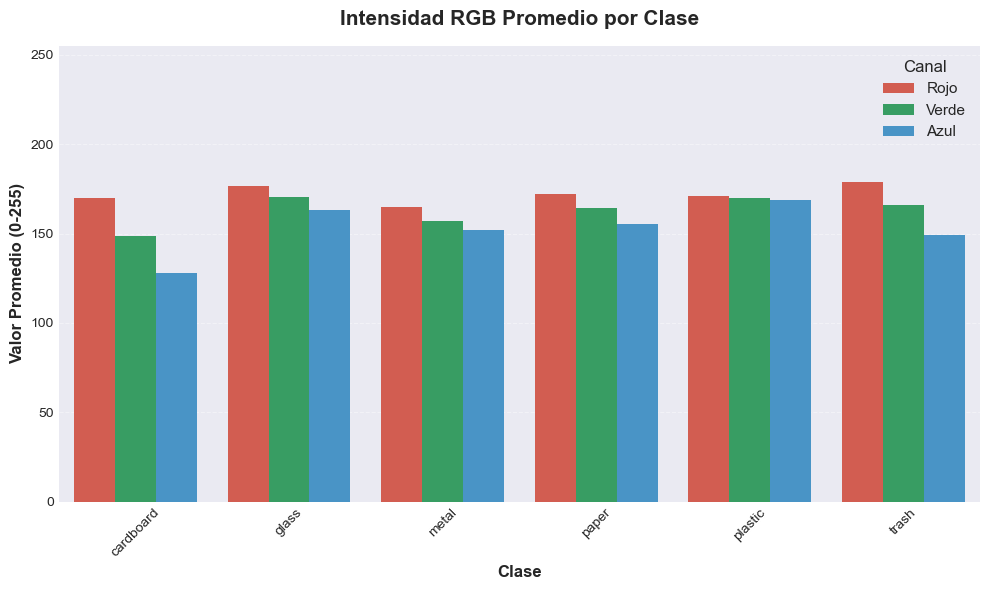

In [11]:
# Visualizacion mejorada de estadisticas de color por clase
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# GRAFICO 1: Intensidad Media con agrupacion por clase
df_mean = df_stats.melt(id_vars=['Clase'], value_vars=['R_mean', 'G_mean', 'B_mean'],
                        var_name='Canal', value_name='Intensidad')
df_mean['Canal'] = df_mean['Canal'].str.replace('_mean', '').map({'R': 'Rojo', 'G': 'Verde', 'B': 'Azul'})

sns.barplot(data=df_mean, x='Clase', y='Intensidad', hue='Canal',
            palette={'Rojo': '#E74C3C', 'Verde': '#27AE60', 'Azul': '#3498DB'},
            ax=ax)

ax.set_title('Intensidad RGB Promedio por Clase', fontsize=15, fontweight='bold', pad=15)
ax.set_ylabel('Valor Promedio (0-255)', fontsize=12, fontweight='bold')
ax.set_xlabel('Clase', fontsize=12, fontweight='bold')
ax.set_ylim(0, 255)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Canal', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

## 9. Exploración Visual de Imágenes

Visualizamos muestras representativas de cada clase para entender la variabilidad del dataset.

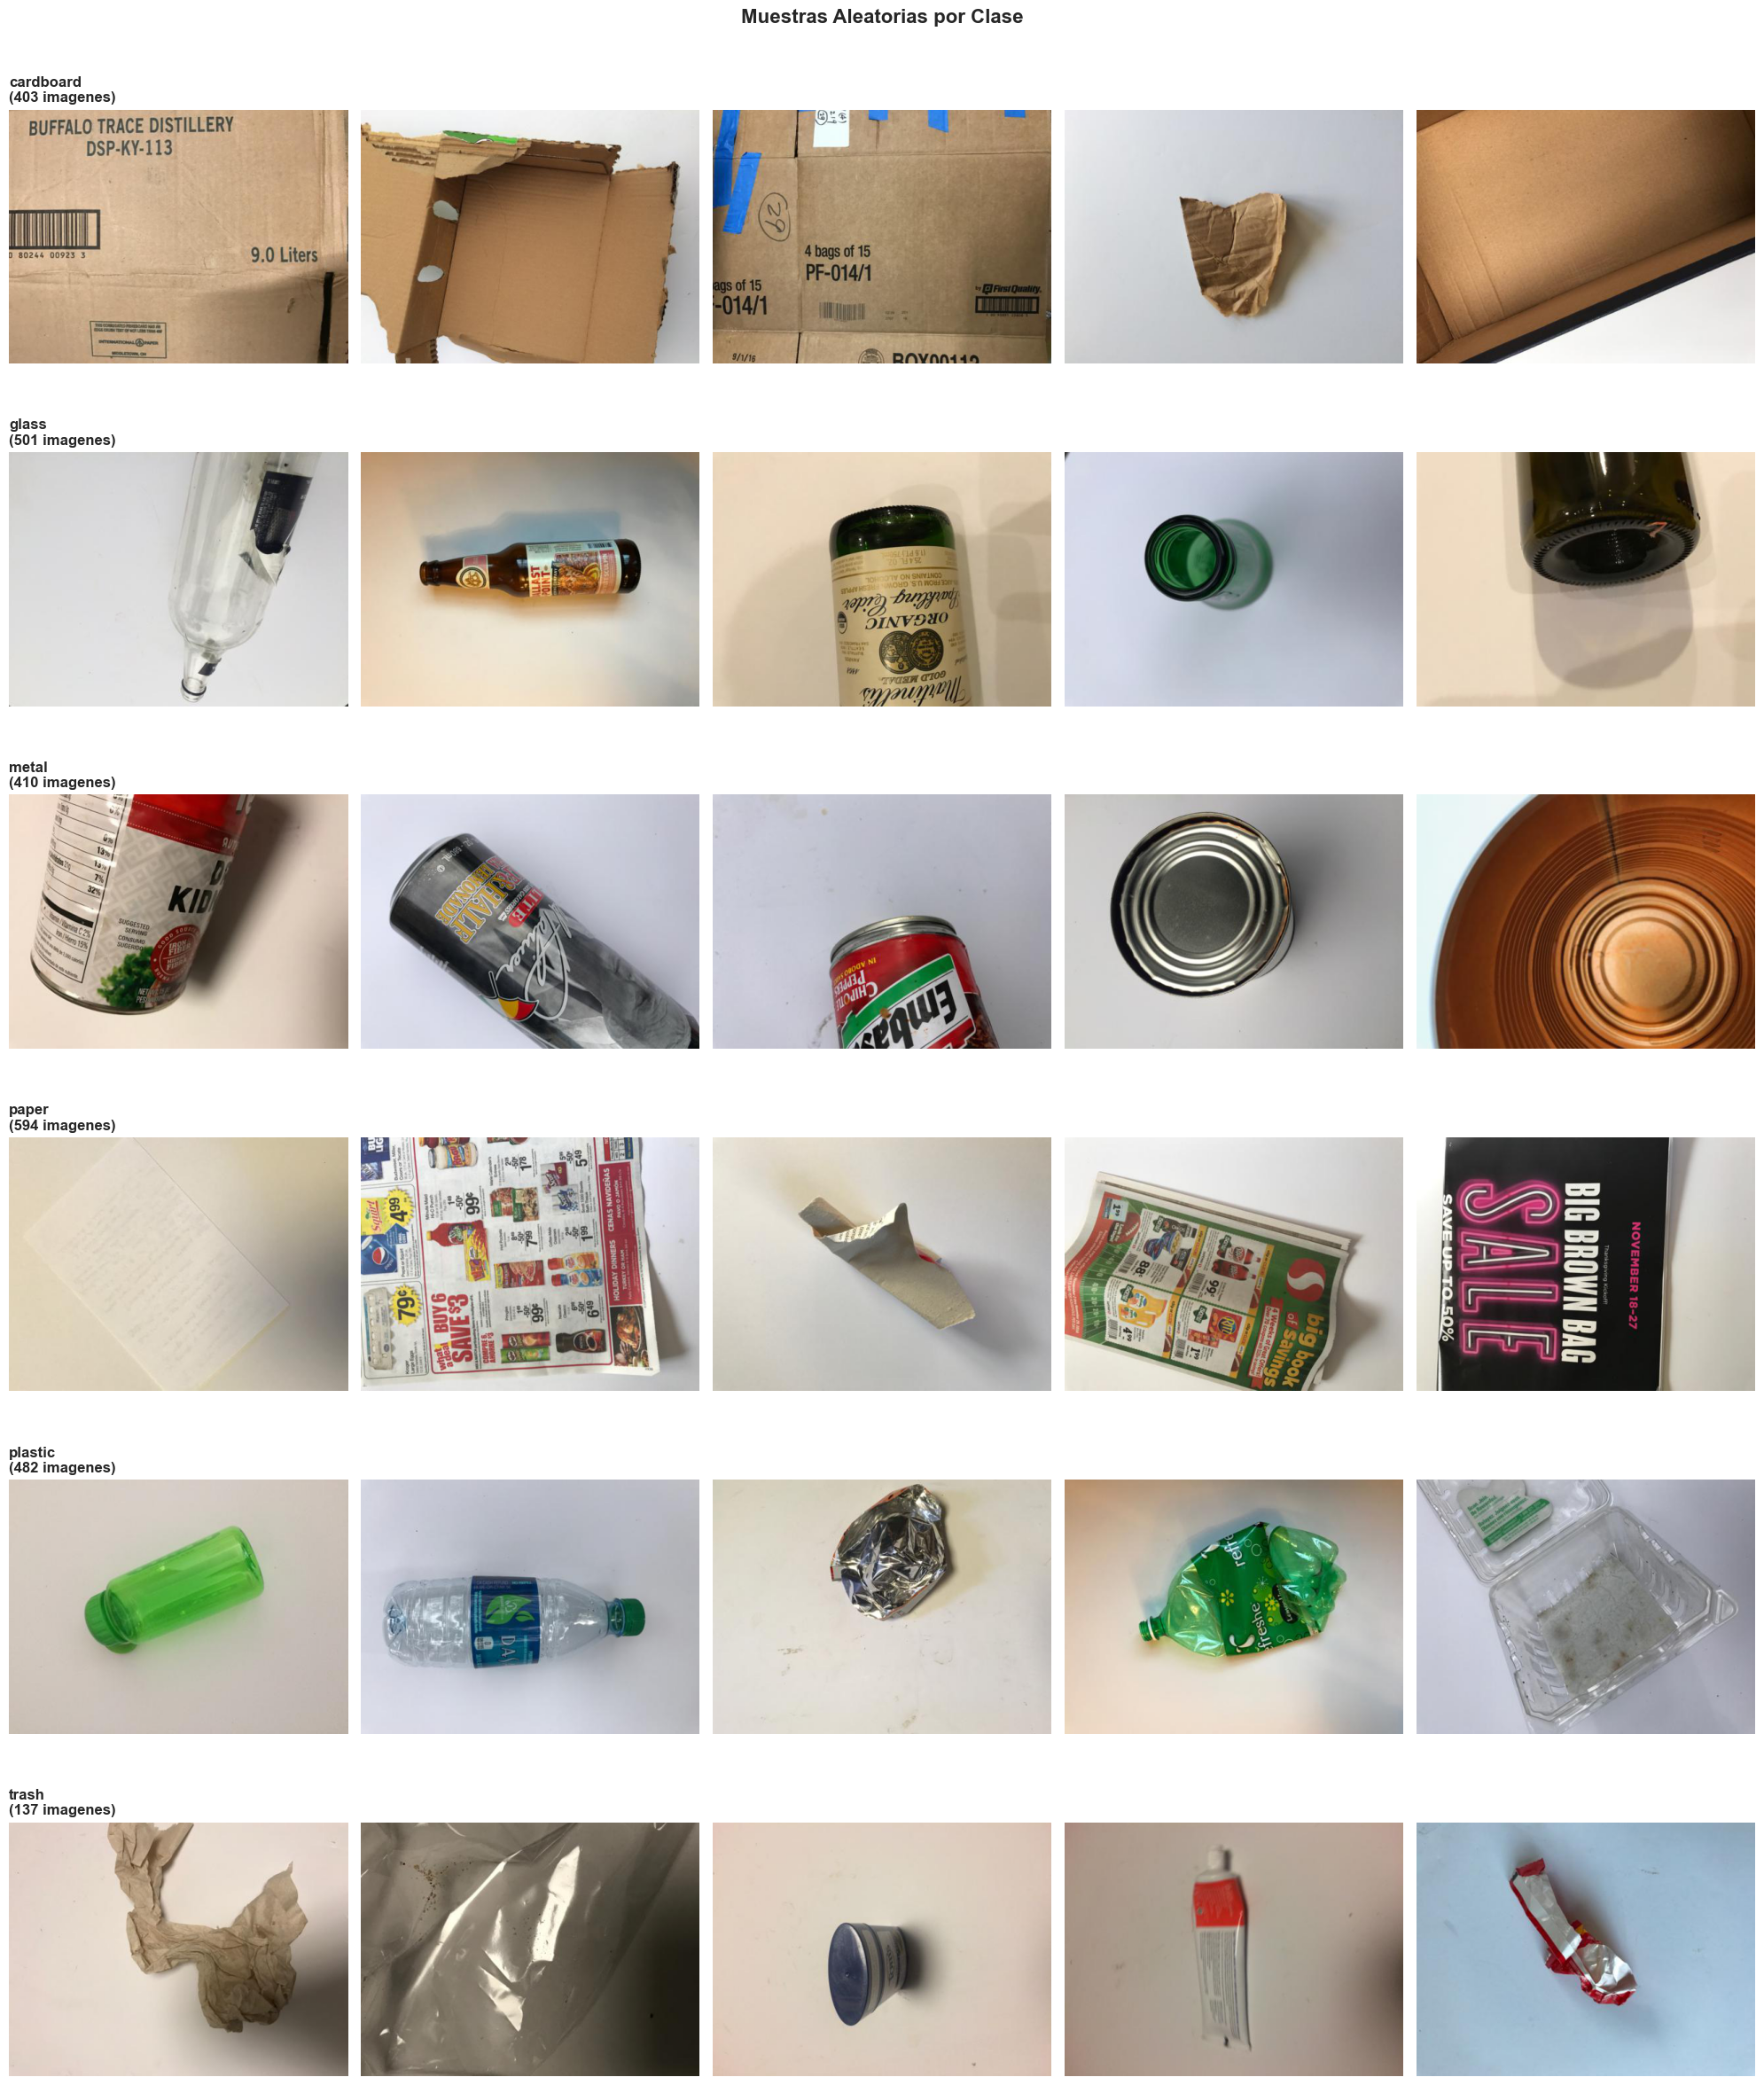

In [14]:
# Mostrar muestras de cada clase
num_classes = len(class_names)
samples_per_class = 5

fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(20, 4 * num_classes))

for class_idx in range(num_classes):
    # Obtener indices de imagenes de esta clase
    class_indices = np.where(y == class_idx)[0]
    
    # Seleccionar muestras aleatorias
    sample_indices = np.random.choice(class_indices, 
                                     min(samples_per_class, len(class_indices)), 
                                     replace=False)
    
    for sample_idx, img_idx in enumerate(sample_indices):
        ax = axes[class_idx, sample_idx] if num_classes > 1 else axes[sample_idx]
        
        # Mostrar imagen
        img = np.asarray(X[img_idx])
        if img.dtype == object:
            img = img.astype(np.uint8)
        if img.ndim == 2:
            img = np.stack([img, img, img], axis=-1)
        ax.imshow(img)
        ax.axis('off')
        
        # Titulo solo en la primera columna
        if sample_idx == 0:
            ax.set_title(f'{class_names[class_idx]}\n({class_counts[class_idx]} imagenes)',
                        fontweight='bold', fontsize=12, loc='left')

plt.suptitle('Muestras Aleatorias por Clase', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()

Calculando brillo promedio por clase...


C:\Users\carlo\AppData\Local\Temp\ipykernel_12188\2482328635.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=brightness_df, x='Clase', y='Brillo', palette='husl')


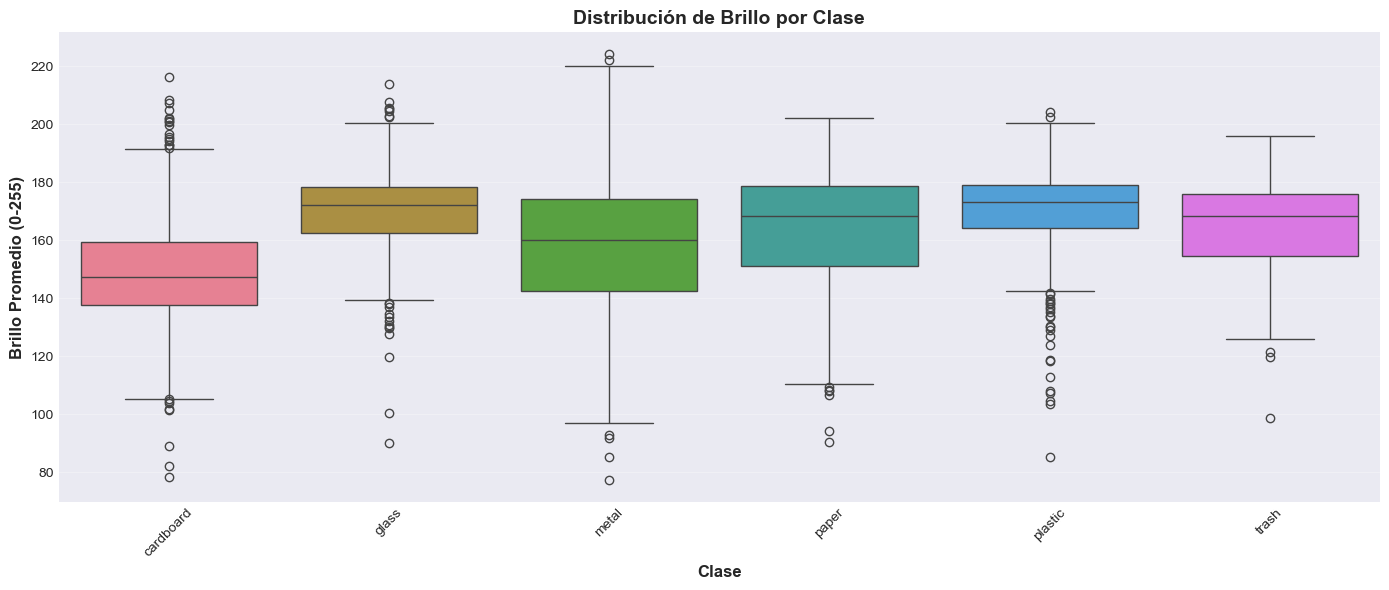


Estadísticas de brillo por clase:
  cardboard      : Media=148.96, Std= 21.89
  glass          : Media=170.00, Std= 14.81
  metal          : Media=157.91, Std= 25.49
  paper          : Media=164.05, Std= 19.46
  plastic        : Media=170.05, Std= 14.82
  trash          : Media=164.65, Std= 17.39


In [ ]:
# Análisis de brillo promedio por clase
brightness_by_class = {i: [] for i in range(num_classes)}

print("Calculando brillo promedio por clase...")
for idx, (img, label) in enumerate(zip(X, y)):
    # Calcular brillo como promedio de todos los canales
    brightness = np.mean(img)
    brightness_by_class[label].append(brightness)

# Crear DataFrame para visualización
brightness_df = pd.DataFrame([
    {'Clase': class_names[class_idx], 'Brillo': brightness}
    for class_idx, brightnesses in brightness_by_class.items()
    for brightness in brightnesses
])

# Visualización
plt.figure(figsize=(14, 6))
sns.boxplot(data=brightness_df, x='Clase', y='Brillo', palette='husl')
plt.xlabel('Clase', fontweight='bold', fontsize=12)
plt.ylabel('Brillo Promedio (0-255)', fontweight='bold', fontsize=12)
plt.title('Distribución de Brillo por Clase', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas de brillo por clase
print("\nEstadísticas de brillo por clase:")
for class_idx in range(num_classes):
    class_brightness = brightness_by_class[class_idx]
    print(f"  {class_names[class_idx]:15s}: Media={np.mean(class_brightness):6.2f}, Std={np.std(class_brightness):6.2f}")